In [1]:
import pandas as pd
import numpy as np
from fastai.vision import *

In [2]:
path = '../../test'

In [3]:
df = pd.read_csv('cleaned_trinary_training_70.csv')
df = df.drop(columns='object_labels')
df.head()

,id,tags
0,a1f0fd29e6ae9a8618baac0a27e13676e192ee03c38e79...,HighCrime
1,68934fb5c279c38cda8e88fa67d2d6a664ec3fefac0793...,NoCrime
2,73e74e658d83ec20d35cf16ce461b9538ecdc59ea70ff8...,NoCrime
3,676508fcd73d674bac82600e02b5d58a562a7493046baf...,NoCrime
4,7a6c29f171fe6d3b550f24d7650c229e298c67fc2bbef3...,NoCrime


In [8]:
np.random.seed(42)
tfms = get_transforms(max_zoom=1)
src = (ImageList.from_csv("", 'cleaned_trinary_training_70.csv', folder='images')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [9]:
data = (src.transform(tfms,size=256)
        .databunch(bs=64).normalize(imagenet_stats))

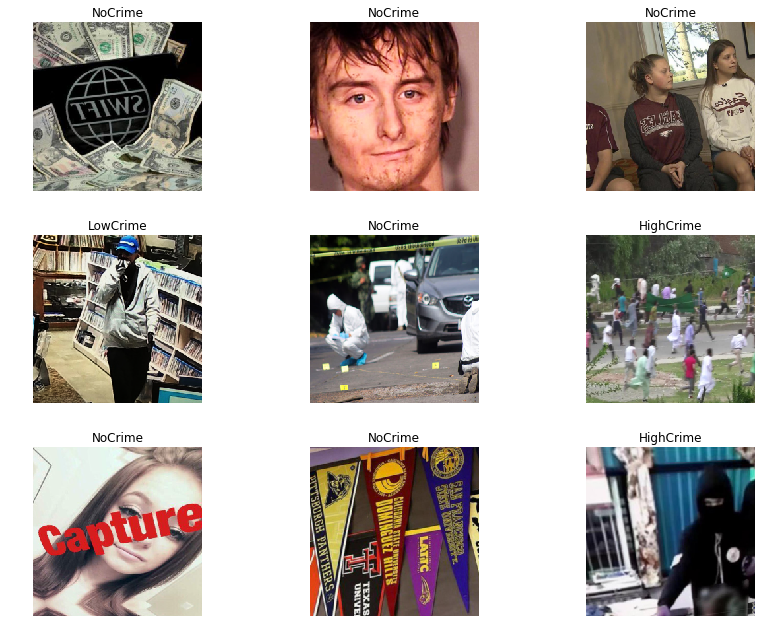

In [10]:
data.show_batch(rows=3, figsize=(12, 9))

In [7]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, models.resnet18, metrics=[acc_02, f_score])

/home/rkaul/.local/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (1579 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
HighCrime,NoCrime,NoCrime,NoCrime,NoCrime
Path: /fred/oz126/rkaul/test;

Valid: LabelList (394 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
LowCrime,NoCrime,NoCrime,HighCrime,NoCrime
Path: /fred/oz126/rkaul/test;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchN

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


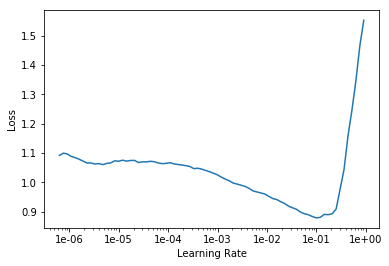

In [10]:
learn.recorder.plot()

In [11]:
lr = 0.01
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.872087,0.797557,0.598985,0.689147,00:25
1,0.664373,0.504362,0.734349,0.749396,00:23
2,0.538417,0.419188,0.732656,0.790549,00:23
3,0.453271,0.399565,0.754653,0.808738,00:24


In [12]:
learn.save('viscrime-stage-restnet18v1')

In [13]:
lr = 0.01
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.352335,0.463967,0.737733,0.792966,00:24
1,0.384631,0.510768,0.746193,0.733200,00:24
2,0.366136,0.429221,0.755499,0.783539,00:24
3,0.336542,0.417957,0.760575,0.799130,00:23


In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


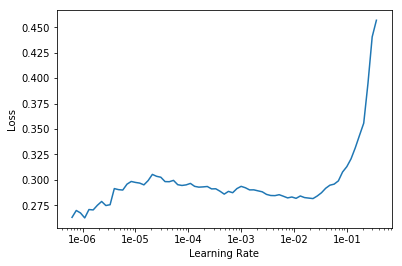

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.305934,0.417130,0.763959,0.796773,00:24
1,0.300267,0.419408,0.765651,0.799492,00:27
2,0.293748,0.419707,0.757191,0.790911,00:24
3,0.288441,0.418421,0.757191,0.794235,00:24
4,0.289097,0.417370,0.758883,0.797196,00:27
5,0.284735,0.415678,0.757191,0.794356,00:25
6,0.290625,0.417719,0.757191,0.796833,00:25
7,0.293576,0.420127,0.761421,0.798888,00:26
8,0.293949,0.418505,0.759729,0.793993,00:23
9,0.292352,0.420802,0.759729,0.793691,00:24


In [16]:
learn.save('viscrime-stage-restnet18v1')

In [17]:
# data = (src.transform(size=256)
#         .databunch(bs=64).normalize(imagenet_stats))
# learn.data = data

In [18]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


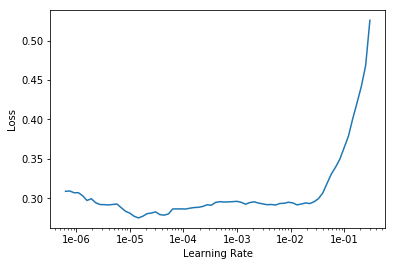

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
lr=1e-2
learn.fit_one_cycle(10,lr)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.302705,0.415555,0.765651,0.794658,00:26
1,0.306302,0.525810,0.744501,0.732657,00:24
2,0.340785,0.625544,0.704738,0.717247,00:24
3,0.359885,0.512261,0.747039,0.760817,00:25
4,0.349799,0.564587,0.756345,0.739546,00:24
5,0.334659,0.444575,0.767344,0.773447,00:23
6,0.307855,0.460899,0.768190,0.772601,00:23
7,0.283398,0.447315,0.777496,0.778281,00:24
8,0.257390,0.450549,0.780034,0.779248,00:24
9,0.236694,0.449798,0.780034,0.777073,00:24


In [21]:
learn.save('viscrime-stage-restnet18v1-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


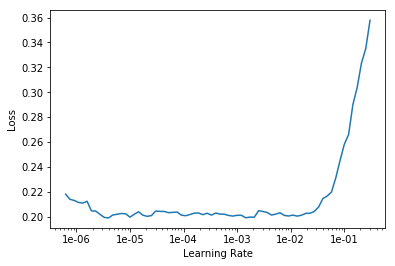

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.292438,0.616565,0.759729,0.725647,00:40
1,0.347657,1.094202,0.769036,0.724075,00:31
2,0.341828,0.591718,0.787648,0.746435,00:26
3,0.312907,0.472868,0.770728,0.765833,00:25
4,0.269290,0.441760,0.769036,0.771271,00:24


In [26]:
learn.save('viscrime-stage-restnet18v1-4')

In [27]:
learn.export()

In [12]:
learner = load_learner('./')

In [16]:
df = pd.read_csv('cleaned_trinary_training_70.csv')
df = df.drop(columns='object_labels')
image_ids = df['id']
tags = df['tags']
df.head()

,id,tags
0,a1f0fd29e6ae9a8618baac0a27e13676e192ee03c38e79...,HighCrime
1,68934fb5c279c38cda8e88fa67d2d6a664ec3fefac0793...,NoCrime
2,73e74e658d83ec20d35cf16ce461b9538ecdc59ea70ff8...,NoCrime
3,676508fcd73d674bac82600e02b5d58a562a7493046baf...,NoCrime
4,7a6c29f171fe6d3b550f24d7650c229e298c67fc2bbef3...,NoCrime


In [11]:
test_src = (ImageList.from_csv(path="",csv_name='cleaned_trinary_training_70.csv', folder='images')
       .split_by_rand_pct(1.0)
       .label_from_df(label_delim=' '))

/home/rkaul/.local/lib/python3.6/site-packages/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")


In [12]:
data_test = (test_src.transform(size=256)
        .databunch(bs=2).normalize(imagenet_stats))

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
import cv2
import skimage.io

learn = create_cnn(data_test, models.resnet18)
learn=load_learner('')

/home/rkaul/.local/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [22]:
y_pred = []
y_pred_prob = []
for i,tag in enumerate(tags[:20]):
    
    filename = 'images/{}'.format(image_ids[i])
#     img = skimage.io.imread(filename)


#     plt.imshow(img)
    y = learn.predict(open_image(filename),thresh=0.2)
#     plt.show()
    y_pred.append(list(y[1].numpy()))
    print(y[2].numpy())

[0.874647 0.027553 0.086953]
[0.030337 0.067712 0.881433]
[0.141552 0.082107 0.796154]
[0.020734 0.004478 0.970227]
[3.509314e-02 1.181922e-04 9.836600e-01]
[0.297008 0.527055 0.104728]
[0.785433 0.205501 0.024296]
[0.049447 0.001572 0.937579]
[1.078673e-01 4.066853e-04 9.505244e-01]
[0.099892 0.090193 0.799679]
[0.98072  0.022109 0.013636]
[2.902912e-03 3.672080e-05 9.962584e-01]
[0.267511 0.551182 0.084244]
[1.147480e-03 8.514589e-04 9.980782e-01]
[0.197609 0.001351 0.869246]
[0.00232  0.00994  0.981247]
[8.177705e-03 2.450541e-04 9.935986e-01]
[0.928078 0.032074 0.0664  ]
[4.451755e-03 1.982840e-04 9.965208e-01]
[0.291709 0.078966 0.638307]


In [13]:
y_true_val = []
for tag in tags:
    y_true_val.append(tag.split())
print(y_true_val)

[['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['LowCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['LowCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['HighCrime'], ['LowCrime'], ['LowCrime'], ['NoCrime'], ['NoCrime'], ['LowCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['LowCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['LowCrime'], ['LowCrime'], ['HighCrime'], ['LowCrime'], ['HighCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['HighCrime'], ['LowCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['LowCrime'], ['HighCrime'], ['HighCrime'], ['LowCrime'], ['NoCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['HighCrime'], ['NoCrime'], ['NoCrime'], ['NoCrime'], ['No

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

one_hot = MultiLabelBinarizer()
y_true = one_hot.fit_transform(y_true_val)
print(y_true)

[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [27]:

with open('fastai_resnet18_70_training_result.csv', 'w') as csvfile:
    fieldnames = ['id', 'y_true','y_pred','y_pred_prob']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(y_true)):
        writer.writerow({'id': image_ids[i], 'y_true':list(y_true[i]),'y_pred':y_pred[i],'y_pred_prob':y_pred_prob[i]})
   

In [23]:
y_pred.count([0.0, 0.0, 0.0])

0